## Esercitazione 7 -  9 Aprile 2024

In [2]:
import numpy as np
from numpy.linalg import eigvals, norm, inv, det
from math import inf, cos, sin
import matplotlib.pyplot as plt

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [3]:
def newtonraphson_corde(fname, jacname, x0, tolx, tolf, nmax):
    # valutare J(xk-1), per il metodo delle corde si utilizza
    # lo stesso Jacobiano J(X0) per tutte le iterazioni k.
    J =  jacname(x0)

    # se il determinante di J(x0) è nullo, il metodo non è applicabile
    if det(J) == 0:
        return None, None, None

    inv_J = inv(J)

    it = 0
    errors = [inf]
    xk = x0
    sk = inf
    fxk = fname(x0)

    # criteri di arresto:
    # - ||X_{k+1}-X_k||/||X_{k}||<= tolx
    # - ||F(Xk+1)|| <= tolf;
    # - it >= nmax
    while norm(fxk) >= tolf and errors[it] >= tolx and it < nmax:
        # risolvere J(xk-1)*Sk-1 = -F(xk-1)
        sk = np.dot(- inv_J, fxk)
        # porre xk = xk-1 + sk-1
        errors.append(norm(sk) / norm(xk))
        xk = xk + sk

        fxk = fname(xk)
        it += 1

    return xk, errors[1:], it

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [4]:
def newtonraphson_sham(fname, jacname, x0, tolx, tolf, nmax):
    m = 3
    it = 0
    errors = [inf]
    xk = x0
    sk = inf
    fxk = fname(x0)

    # criteri di arresto:
    # - ||X_{k+1}-X_k||/||X_{k}||<= tolx
    # - ||F(Xk+1)|| <= tolf;
    # - it >= nmax
    while norm(fxk) >= tolf and errors[it] >= tolx and it < nmax:
        if it % m == 0:
            # Si valuta lo Jacobiano ogni m iterazioni e quindi lo
            # si utilizza per le m iterazioni successive
            J =  jacname(xk)
            # se il determinante di J(x0) è nullo, il metodo non è applicabile
            if det(J) == 0:
                return None, None, None
            inv_J = inv(J)

        # risolvere J(xk-1)*Sk-1 = -F(xk-1)
        sk = np.dot(- inv_J, fxk)
        # porre xk = xk-1 + sk-1
        errors.append(norm(sk) / norm(xk))
        xk = xk + sk

        fxk = fname(xk)
        it += 1

    return xk, errors[1:], it

Risolvere i seguenti tre sistemi non lineari:
1) 2x0-cos(x1)=0
sin(x0)+2x1=0

2) x0^2+x1^2-9=0
x0^2+x1*2-2=0

3) 4x0^2+x_1^2^=4
x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

zero_corde [ 0.48640515 -0.2337255 ] it_corde 21
F(zero_code): [ 1.83263404e-11 -6.54665211e-11]
zero_sham [ 0.48640515 -0.2337255 ] it_sham 7
F(zero_sham): [0. 0.]


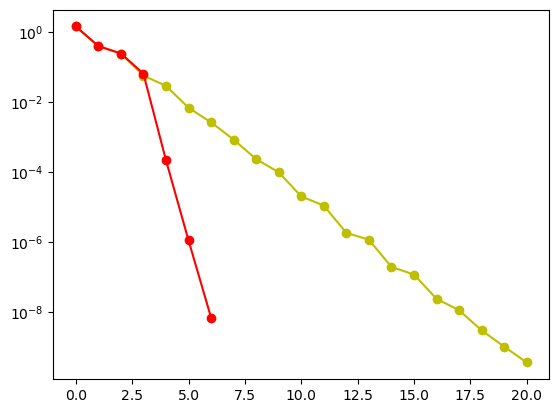

In [5]:
F1 = lambda x: np.array([2 * x[0] - cos(x[1]), sin(x[0]) + 2 * x[1]])
J1 = lambda x: np.array([
    [2, sin(x[1])],
    [cos(x[0]), 2]
])

tolf = tolx = 1e-10
x0 = np.array([-1, 1])
NMAX = 100

zero_corde, err_cord, it_corde = newtonraphson_corde(F1, J1, x0, tolx, tolf, NMAX)
print("zero_corde", zero_corde, "it_corde", it_corde)
print("F(zero_code):", F1(zero_corde))

zero_sham, err_sham, it_sham = newtonraphson_sham(F1, J1, x0, tolx, tolf, NMAX)
print("zero_sham", zero_sham, "it_sham", it_sham)
print("F(zero_sham):", F1(zero_sham))

plt.semilogy(range(it_corde), err_cord, '-oy')
plt.semilogy(range(it_sham), err_sham, '-or')
plt.show()

In [6]:
# x0^2+x1^2-9=0, x0^2+x1*2-2=0
F2 = lambda x: np.array([x[0]**2 + x[1]**2 - 9, x[0]**2 + x[1]*2 - 2])
J2 = lambda x: np.array([
    [2*x[0], 2*x[1]],
    [2*x[0], 2]
])

tolf = tolx = 1e-2
x0 = np.array([-1, 1])
NMAX = 100

zero_corde, err_cord, it_corde = newtonraphson_corde(F2, J2, x0, tolx, tolf, NMAX)
print("zero_corde", zero_corde, "it_corde", it_corde)
if zero_corde is not None:
    print("F(zero_code):", F2(zero_corde))

zero_sham, err_sham, it_sham = newtonraphson_sham(F2, J2, x0, tolx, tolf, NMAX)
print("zero_sham", zero_sham, "it_sham", it_sham)
if zero_sham is not None:
    print("F(zero_sham):", F2(zero_sham))

if err_cord is not None:
    plt.semilogy(range(it_corde), err_cord, '-oy')
if err_sham is not None:
    plt.semilogy(range(it_sham), err_sham, '-or')
plt.show()

zero_corde None it_corde None
zero_sham None it_sham None


## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



In [7]:
def newtonraphson_minimo(grad_name, hess_name, x0, tolx, tolf, nmax):
    it = 0
    errors = [inf]
    xk = x0
    sk = inf
    gxk = grad_name(x0)

    # criteri di arresto:
    # - ||X_{k+1}-X_k||/||X_{k}||<= tolx
    # - ||F(Xk+1)|| <= tolf;
    # - it >= nmax
    while norm(gxk) >= tolf and errors[it] >= tolx and it < nmax:
        #valore H(xk)
        H = hess_name(xk)

        # se il determinante di H(x0) è nullo, il metodo non è applicabile
        if det(H) == 0:
            return None, None, None

        # risolvere il sistema lineare H(xk) sk = -grad_name(𝑥k)
        inv_H = inv(H)
        sk = -inv_H @ grad_name(xk)

        # porre xk = xk-1 + sk-1
        errors.append(norm(sk) / norm(xk))
        xk = xk + sk

        gxk = grad_name(xk)
        it += 1

    return xk, errors[1:], it

x_min [2. 1.] it_min 1
F(x_min): -5.0


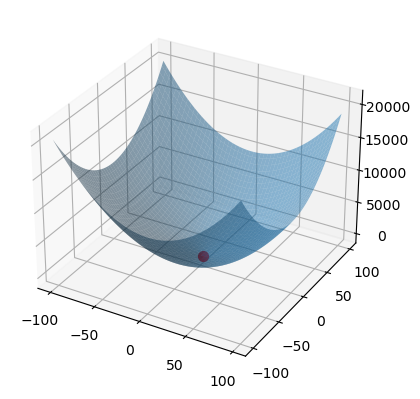

In [34]:
#  𝑓(𝑥1, 𝑥2) = 𝑥1^2 + 𝑥2^2 − 4𝑥1 − 2𝑥2.
F = lambda x: x[0]**2 + x[1]**2 - 4*x[0] - 2*x[1]
GRAD_F = lambda x: np.array([2*x[0] - 4, 2*x[1] - 2]).transpose()
HESS_F = lambda x: np.array([[2, 0], [0, 2]])

tolf = tolx = 1e-10
x0 = np.array([-2, 1])
NMAX = 10

x_min, err_min, it_min = newtonraphson_minimo(GRAD_F, HESS_F, x0, tolx, tolf, NMAX)
print("x_min", x_min, "it_min", it_min)
print("F(x_min):", F(x_min))

x_g = np.arange(-100,100,1)
y_g = np.arange(-100,100,1)
X,Y = np.meshgrid(x_g, y_g)
Z = F([X,Y])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, alpha=0.5)
ax.scatter(x_min[0], x_min[1], F(x_min), color='r', s=50)
plt.show()

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [9]:
def norm_inf(A):
    somma_righe = [np.sum(np.abs(row)) for row in A]
    return max(somma_righe)

def norm_one(A):
    return norm_inf(np.transpose(A))

A = np.array([
    [1, -2, 3],
    [-4, 5, 6]
])
print(A)

print("norma inf A:", norm_inf(A))
print("norma uno A:", norm_one(A))

[[ 1 -2  3]
 [-4  5  6]]
norma inf A: 15
norma uno A: 9


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [10]:
A = np.array([
    [4,-1,6],
    [2,3,-3],
    [1,-2,9/2]
])

def norm2(A: np.matrix):
    M = np.dot(A.transpose(), A)
    # il raggio spettrale è la grandezza dell'autovalore con modulo massimo.
    p = np.max(np.abs(eigvals(M)))
    return np.sqrt(p)

print("norm2 A:", norm2(A))
print("norm A:", norm(A, 2))

norm2 A: 9.056251013341882
norm A: 9.056251013341878
